In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('20220419-New-table_MIC-MBC.csv')
raw_data

Date  Inoculum_size  MIC  MBC
0   20220111            500    2    8
1   20220111           1000    4    6
2   20220111           5000    4   16
3   20220111          10000    3   12
4   20211222            500    2    8
5   20211222           1000    2   12
6   20211222           5000    2   12
7   20211222          10000    4   14
8   20220304            500    4   12
9   20220304           1000    2   14
10  20220304           5000    2   20
11  20220304          10000    4   18
12  20220303            500    4   12
13  20220303           1000    4   20
14  20220303           5000    4   16
15  20220303          10000    4   18

In [3]:
chip_data=pd.DataFrame(
    {
        'Date': '20220419',
        'Inoculum_size': np.array([.7, 1.3, 5.4, 4.1, 1.3])*500,
        'measurement': 'chip',
        'lethal_concentration': [10, 10, 15, 15, 12]
    }
)

In [4]:
data = pd.concat(
    [
        raw_data.melt(
            id_vars = ["Date","Inoculum_size"], 
            value_vars=["MIC","MBC"],
            var_name="measurement",
            value_name='lethal_concentration',
        ),
        chip_data
    ], 
    ignore_index=True
)
data

Date  Inoculum_size measurement  lethal_concentration
0   20220111          500.0         MIC                     2
1   20220111         1000.0         MIC                     4
2   20220111         5000.0         MIC                     4
3   20220111        10000.0         MIC                     3
4   20211222          500.0         MIC                     2
5   20211222         1000.0         MIC                     2
6   20211222         5000.0         MIC                     2
7   20211222        10000.0         MIC                     4
8   20220304          500.0         MIC                     4
9   20220304         1000.0         MIC                     2
10  20220304         5000.0         MIC                     2
11  20220304        10000.0         MIC                     4
12  20220303          500.0         MIC                     4
13  20220303         1000.0         MIC                     4
14  20220303         5000.0         MIC                     4
15  20220303        10000.0         MIC                     4
16  20220111          500.0         MBC                     8
17  20220111         1000.0         MBC                     6
18  20220111         5000.0         MBC                    16
19  20220111        10000.0         MBC                    12
20  20211222          500.0         MBC                     8
21  20211222         1000.0         MBC                    12
22  20211222         5000.0         MBC                    12
23  20211222        10000.0         MBC                    14
24  20220304          500.0         MBC                    12
25  20220304         1000.0         MBC                    14
26  20220304         5000.0         MBC                    20
27  20220304        10000.0         MBC                    18
28  20220303          500.0         MBC                    12
29  20220303         1000.0         MBC                    20
30  20220303         5000.0         MBC                    16
31  20220303        10000.0         MBC                    18
32  20220419          350.0        chip                    10
33  20220419          650.0        chip                    10
34  20220419         2700.0        chip                    15
35  20220419         2050.0        chip                    15
36  20220419          650.0        chip                    12

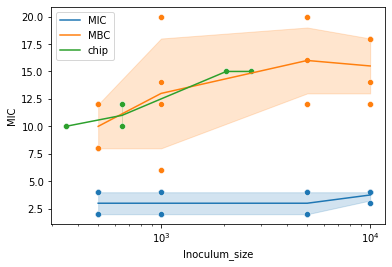

In [5]:
ax = sns.lineplot(data=raw_data, x='Inoculum_size', y='MIC', label='MIC')
sns.lineplot(ax=ax, data=raw_data, x='Inoculum_size', y='MBC', label='MBC')
sns.scatterplot(ax=ax, data=raw_data, x='Inoculum_size', y='MIC',)
sns.scatterplot(ax=ax, data=raw_data, x='Inoculum_size', y='MBC',)
sns.scatterplot(ax=ax, data=chip_data, x='Inoculum_size', y='lethal_concentration', markers='+')
sns.lineplot(ax=ax, data=chip_data, x='Inoculum_size', y='lethal_concentration', markers='+', label='chip')
ax.set_xscale('log')

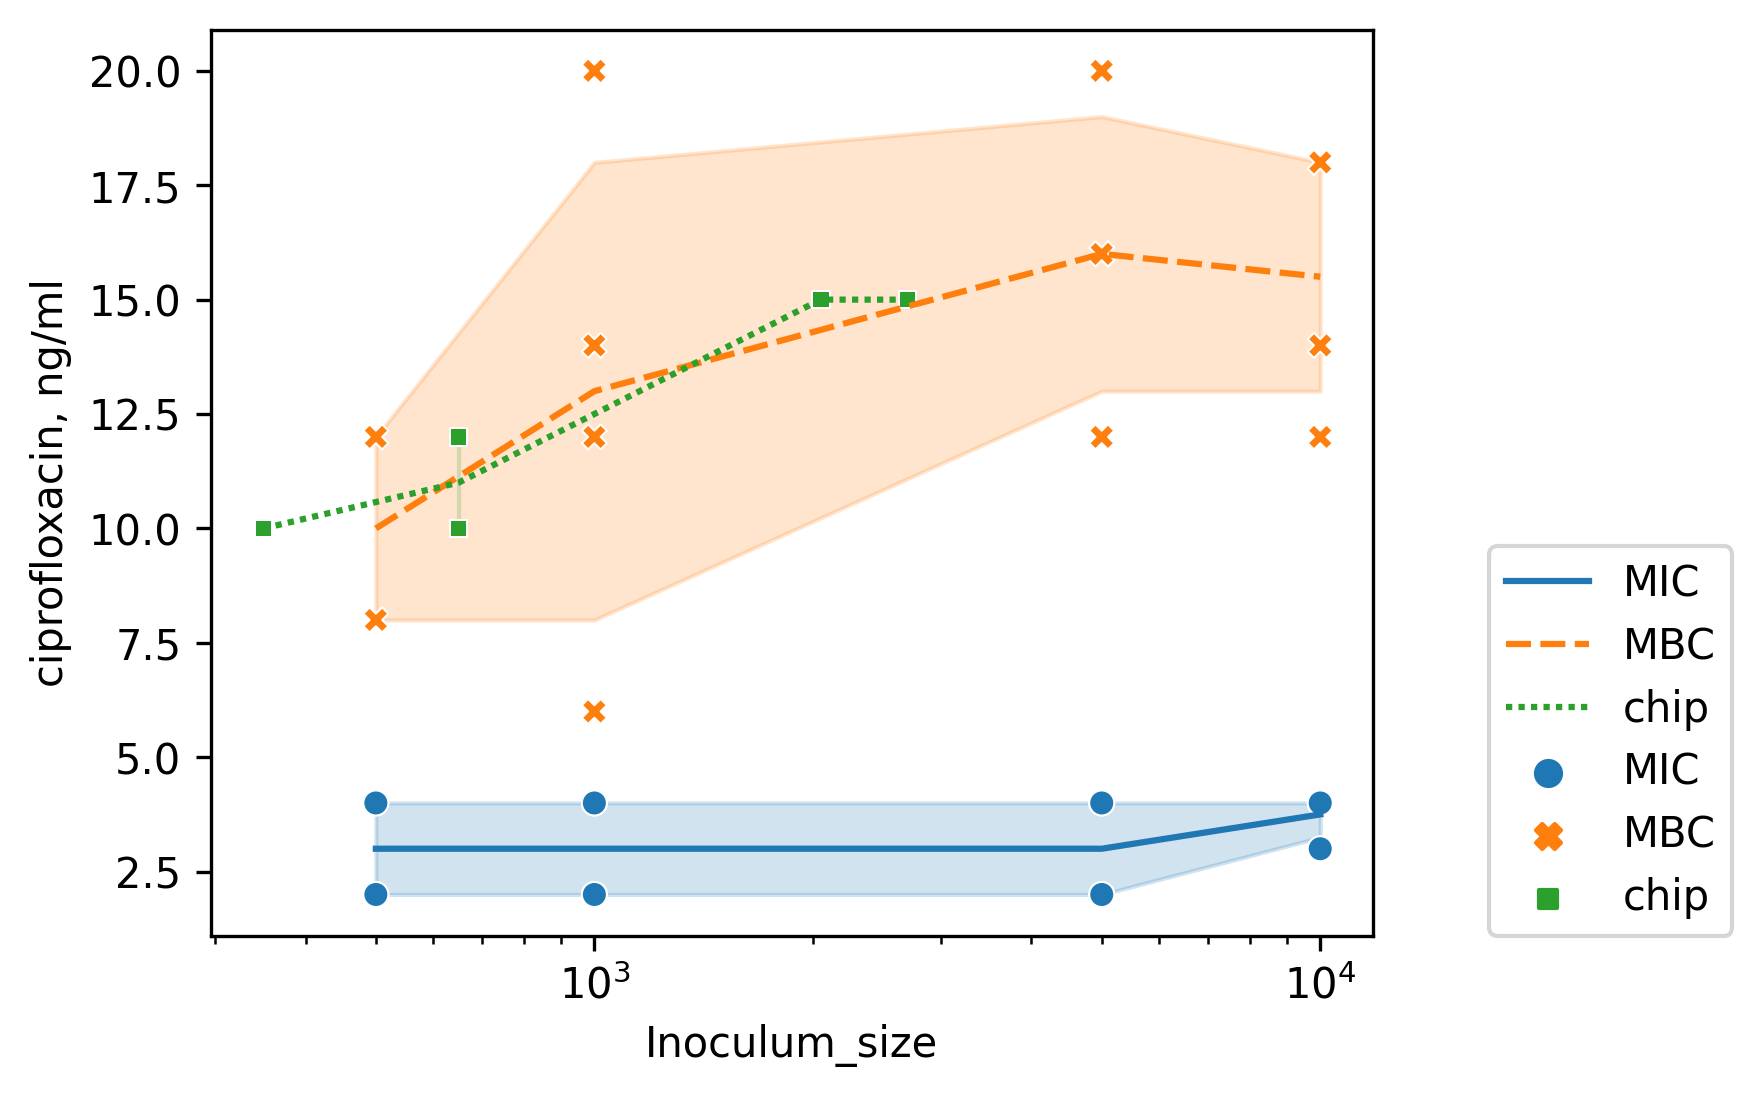

In [7]:
fig, ax = plt.subplots(figsize=(5,4), dpi=300)
ax = sns.lineplot(data=data, x='Inoculum_size', y='lethal_concentration', hue='measurement', style='measurement')
sns.scatterplot(
    ax=ax, 
    data=data, 
    x='Inoculum_size', 
    y='lethal_concentration', 
    hue='measurement', 
    style='measurement', 
)
ax.set_ylabel('ciprofloxacin, ng/ml')
ax.set_xscale('log')
ax.legend(loc=(1.1,0))
fig.savefig('MBC.pdf')

In [49]:
l = ax.legend()

In [52]:
list(l.get_texts())

[Text(0, 0, 'MIC'),
 Text(0, 0, 'MBC'),
 Text(0, 0, 'chip'),
 Text(0, 0, 'MIC'),
 Text(0, 0, 'MBC'),
 Text(0, 0, 'chip')]

In [ ]:
l.set_